In [40]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
import math

In [57]:
#@title Creating Dataset

data = {
    'id': [1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15],
    'age': ['young','young','young','young','young','middle','middle','middle','middle','middle','old','old','old','old','old'],
    'job_status': ['False','False','True','True','False','False','False','True','False','False','False','False','True','True','False'],
    'owns_house': ['False','False','False','True','False','False','False','True','True','True','True','True','False','False','False'],
    'credit_rating':['fair','good','good','fair','fair','fair','good','good','excellent','excellent','excellent','good','good','excellent','fair'],
    'class(Yes or No)':['No','No','Yes','Yes','No','No','No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','No']
}

dataset = pd.DataFrame(data)
print("Dataset:\n", dataset)

dataset.to_csv(r'Task2_Dataset.csv', index=False)


Dataset:
     id     age job_status owns_house credit_rating class(Yes or No)
0    1   young      False      False          fair               No
1    2   young      False      False          good               No
2    3   young       True      False          good              Yes
3    4   young       True       True          fair              Yes
4    5   young      False      False          fair               No
5    6  middle      False      False          fair               No
6    7  middle      False      False          good               No
7    8  middle       True       True          good              Yes
8    9  middle      False       True     excellent              Yes
9   10  middle      False       True     excellent              Yes
10  11     old      False       True     excellent              Yes
11  12     old      False       True          good              Yes
12  13     old       True      False          good              Yes
13  14     old       True      False  

In [58]:
#@title Task 02

df = pd.read_csv('/content/Task2_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                15 non-null     int64 
 1   age               15 non-null     object
 2   job_status        15 non-null     bool  
 3   owns_house        15 non-null     bool  
 4   credit_rating     15 non-null     object
 5   class(Yes or No)  15 non-null     object
dtypes: bool(2), int64(1), object(3)
memory usage: 638.0+ bytes


In [59]:
df.pop('id')

,id
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [63]:
def get_entropy(df_subset):
    values = df_subset.iloc[:, -1].value_counts().to_dict()
    if 'No' not in values:
        return (0, values['Yes'])
    if 'Yes' not in values:
        return (0, values['No'])
    yes_prob = values['Yes']/(values['Yes'] + values['No'])
    no_prob = values['No']/(values['Yes'] + values['No'])
    entro = -yes_prob*math.log(yes_prob, 2)
    entro += -no_prob*math.log(no_prob, 2)
    return (entro, values['Yes'] + values['No'])

df_entropy = get_entropy(df)[0]
length = len(df)
ig_columns = {}
for column in df.columns:
    if column == 'class(Yes or No)':
        continue
    column_unique = df[column].unique()
    ig = df_entropy
    for uniq in column_unique:
        entropy, no_of_datapoint = get_entropy(df[df[column] == uniq])
        ig -= (no_of_datapoint/length) * entropy
    ig_columns[column] = ig

max_ig = 0
max_ig_column_name = ''
for key, value in ig_columns.items():
    if value > max_ig:
        max_ig = value
        max_ig_column_name = key

print(f'Root Node: {max_ig_column_name}, IG: {max_ig}')

Root Node: owns_house, IG: 0.4199730940219749


In [64]:
#@title Task03

cancerDataset = pd.read_csv('/content/cancer patient data sets.csv')
cancerDataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   index                     1000 non-null   int64 
 1   Patient Id                1000 non-null   object
 2   Age                       1000 non-null   int64 
 3   Gender                    1000 non-null   int64 
 4   Air Pollution             1000 non-null   int64 
 5   Alcohol use               1000 non-null   int64 
 6   Dust Allergy              1000 non-null   int64 
 7   OccuPational Hazards      1000 non-null   int64 
 8   Genetic Risk              1000 non-null   int64 
 9   chronic Lung Disease      1000 non-null   int64 
 10  Balanced Diet             1000 non-null   int64 
 11  Obesity                   1000 non-null   int64 
 12  Smoking                   1000 non-null   int64 
 13  Passive Smoker            1000 non-null   int64 
 14  Chest Pain               

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   id                15 non-null     int64 
 1   age               15 non-null     object
 2   job_status        15 non-null     object
 3   owns_house        15 non-null     object
 4   credit_rating     15 non-null     object
 5   class(Yes or No)  15 non-null     object
dtypes: int64(1), object(5)
memory usage: 848.0+ bytes
Information: 
 None


Statistica Summary: 
               id
count  15.000000
mean    8.000000
std     4.472136
min     1.000000
25%     4.500000
50%     8.000000
75%    11.500000
max    15.000000


<Figure size 1000x800 with 0 Axes>

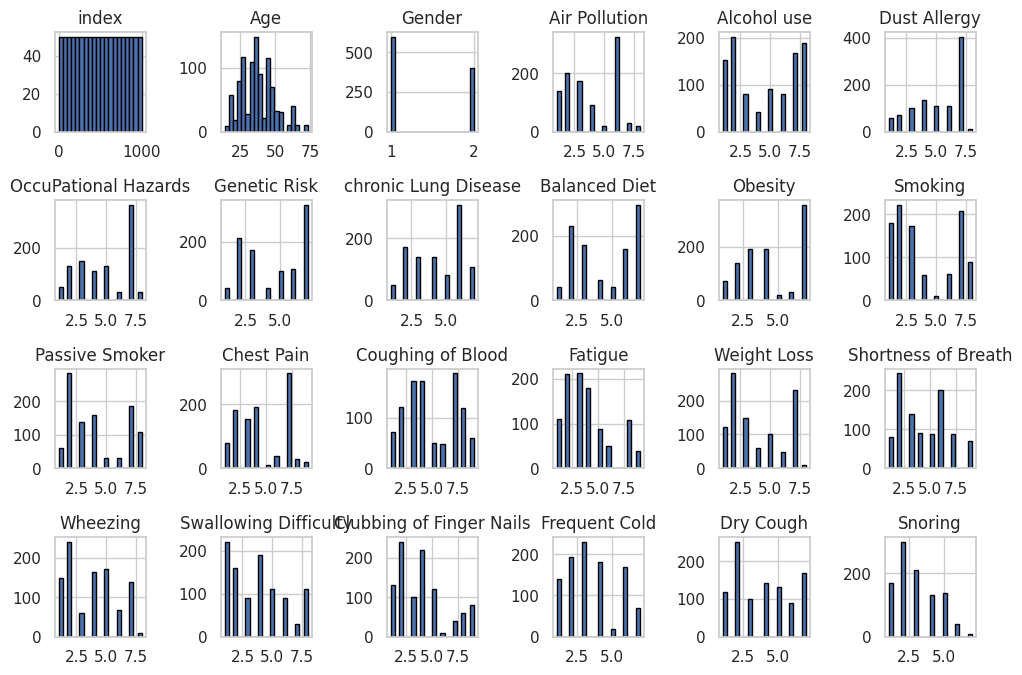


Target Class Distribution:
Level
High      365
Medium    332
Low       303
Name: count, dtype: int64


In [66]:
#Part1
#A (Basic Infromation And Statistical Summary)
print("Information: \n",dataset.info())
print("\n\nStatistica Summary: \n",dataset.describe())

# Feature distributions
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))
cancerDataset.hist(bins=20, figsize=(10, 10), layout=(6, 6), edgecolor="black")
plt.tight_layout()
plt.show()

# Target Class Distribution
print("\nTarget Class Distribution:")
print(cancerDataset['Level'].value_counts())

In [68]:
#B

uniqueCategories = cancerDataset['Level'].value_counts()
print("Unique Categories:\n", uniqueCategories)

if uniqueCategories.max() / uniqueCategories.min() > 1.5:
    print("The Dataset Is ImBalanced.")
else:
    print("The Dataset Is Balanced.")

Unique Categories:
 Level
High      365
Medium    332
Low       303
Name: count, dtype: int64
The Dataset Is Balanced.


In [70]:
#C

if cancerDataset.isnull().values.any():
    missingValues = cancerDataset.isnull().sum()
    print("Missing Values:\n", missingValues)

    cleanedDataset = cancerDataset.fillna(cancerDataset.mean())
    print("Dataset After Removing Missing Values: ", cleanedDataset)
else:
    print("No missing values in the dataset.")


if cancerDataset.duplicated().any():
    duplicateRecords = cancerDataset.duplicated().sum()
    print("\nDuplicate Records:\n", duplicateRecords)

    cleanedDataset = cancerDataset.drop_duplicates()
    print("Dataset After Removing Duplicates: ", cleanedDataset)
else:
    print("No duplicate records in the dataset.")

categoricalFeatures = cancerDataset.select_dtypes(include=['object']).columns
print("\nCategorical Features:\n", categoricalFeatures)

No missing values in the dataset.
No duplicate records in the dataset.

Categorical Features:
 Index(['Patient Id', 'Level'], dtype='object')


In [72]:
#D

cancerDataset = cancerDataset.drop(columns=['Patient Id','Level'])
correlationMatrix = cancerDataset.corr(method='pearson').abs()
print("Correlation Matrix:\n", correlationMatrix)

threshold = 0.9

upper = correlationMatrix.where(np.triu(np.ones(correlationMatrix.shape), k=1).astype(bool))

highCorrelationFeatures = [column for column in upper.columns if any(upper[column] > 0.65)]

print("Selected Features Based ON Pearson Correlation:\n", highCorrelationFeatures)


Correlation Matrix:
                              index       Age    Gender  Air Pollution  \
index                     1.000000  0.002674  0.025739       0.053307   
Age                       0.002674  1.000000  0.202086       0.099494   
Gender                    0.025739  0.202086  1.000000       0.246912   
Air Pollution             0.053307  0.099494  0.246912       1.000000   
Alcohol use               0.041374  0.151742  0.227636       0.747293   
Dust Allergy              0.037960  0.035202  0.204312       0.637503   
OccuPational Hazards      0.032355  0.062177  0.192343       0.608924   
Genetic Risk              0.030725  0.073151  0.222727       0.705276   
chronic Lung Disease      0.025177  0.128952  0.205061       0.626701   
Balanced Diet             0.030743  0.004863  0.099741       0.524873   
Obesity                   0.050584  0.034337  0.123813       0.601468   
Smoking                   0.018407  0.075333  0.206924       0.481902   
Passive Smoker            0.01

In [73]:
#E

scaler = StandardScaler()
scaledDataset = pd.DataFrame(scaler.fit_transform(cancerDataset), columns=cancerDataset.columns)

print("\nScaled DataFrame:")
print(scaledDataset.describe())


Scaled DataFrame:
            index           Age        Gender  Air Pollution   Alcohol use  \
count  1000.00000  1.000000e+03  1.000000e+03   1.000000e+03  1.000000e+03   
mean      0.00000  3.019807e-17  1.811884e-16   4.973799e-17  9.947598e-17   
std       1.00050  1.000500e+00  1.000500e+00   1.000500e+00  1.000500e+00   
min      -1.73032 -1.931249e+00 -8.199029e-01  -1.399439e+00 -1.360357e+00   
25%      -0.86516 -7.853668e-01 -8.199029e-01  -9.066790e-01 -9.785557e-01   
50%       0.00000 -9.783750e-02 -8.199029e-01  -4.139187e-01  1.668470e-01   
75%       0.86516  6.521945e-01  1.219657e+00   1.064362e+00  9.304488e-01   
max       1.73032  2.985627e+00  1.219657e+00   2.049883e+00  1.312250e+00   

       Dust Allergy  OccuPational Hazards  Genetic Risk  chronic Lung Disease  \
count  1.000000e+03          1.000000e+03  1.000000e+03          1.000000e+03   
mean   1.776357e-17          4.263256e-17 -2.131628e-17          6.217249e-17   
std    1.000500e+00          1.0005

In [74]:
#F
dataset = pd.read_csv('/content/cancer patient data sets.csv')
dataset = dataset.drop(columns=['Patient Id'])
X = dataset.drop(columns=['Level'])
y = dataset['Level']

# Split the dataset into training+validation and testing sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Split the training+validation set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.30, random_state=0)

print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Testing set shape:", X_test.shape)

#WHy it is required??
#A validation set is used during model training to tune the hyperparameters.
# And make decisions about which model configuration performs best.
#1. Hyperparameter tuning, 2. Model Selection, 3. Avoid Overfitting, 4. Performance Estimation

Training set shape: (560, 24)
Validation set shape: (240, 24)
Testing set shape: (200, 24)


In [87]:
#G
dtClassifier = DecisionTreeClassifier(criterion='entropy', max_depth=1, min_samples_split=50, min_samples_leaf=30)
dtClassifier.fit(X_train, y_train)

yTrain_pred = dtClassifier.predict(X_train)
yTest_pred = dtClassifier.predict(X_test)

trainingAccuracy = accuracy_score(y_train, yTrain_pred)
testingAccuracy = accuracy_score(y_test, yTest_pred)

print(f"Training Accuracy: {trainingAccuracy:.2f}")
print(f"Testing Accuracy: {testingAccuracy:.2f}")


Training Accuracy: 0.66
Testing Accuracy: 0.61


In [91]:
#@title Task 4

dataset = pd.read_csv('/content/Data.csv')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38472 entries, 0 to 38471
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Entity                           38472 non-null  object 
 1   Continent                        38472 non-null  object 
 2   Latitude                         38472 non-null  float64
 3   Longitude                        38472 non-null  float64
 4   Average temperature per year     38472 non-null  int64  
 5   Hospital beds per 1000 people    38472 non-null  float64
 6   Medical doctors per 1000 people  38472 non-null  float64
 7   GDP/Capita                       38472 non-null  float64
 8   Population                       38472 non-null  int64  
 9   Median age                       38472 non-null  int64  
 10  Population aged 65 and over (%)  38472 non-null  int64  
 11  Date                             38472 non-null  object 
 12  Daily tests       

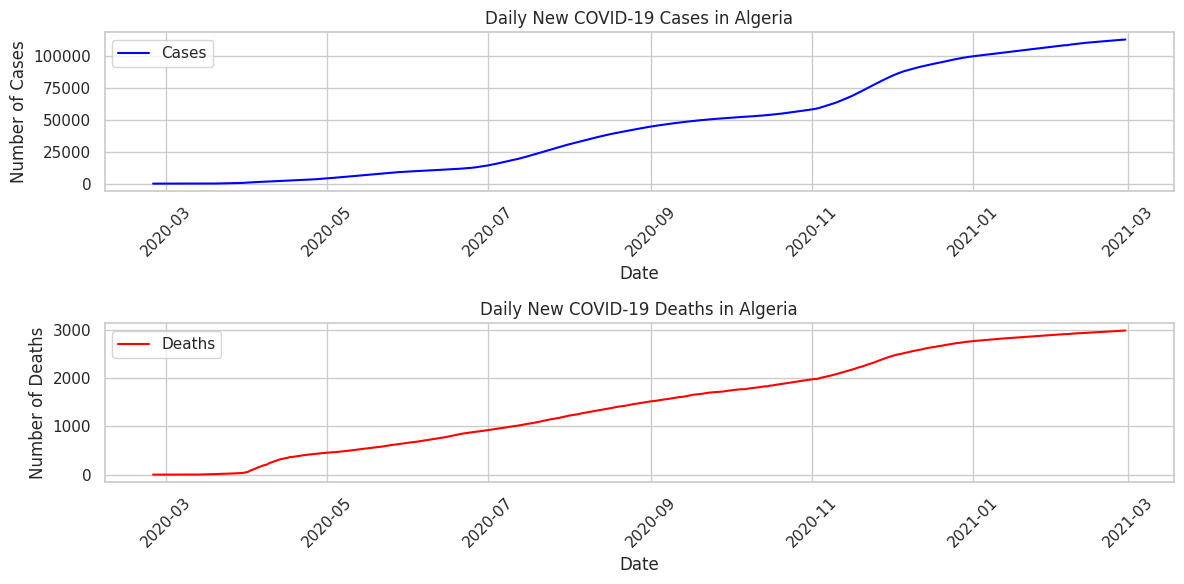

In [111]:
algeria_data = dataset[dataset['Entity'] == 'Algeria'].copy()
algeria_data['Date'] = pd.to_datetime(algeria_data['Date'])

algeria_data['Cases'] = algeria_data['Cases'].fillna(0)
algeria_data['Deaths'] = algeria_data['Deaths'].fillna(0)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
plt.plot(algeria_data['Date'], algeria_data['Cases'], color='blue', label='Cases')
plt.title('Daily New COVID-19 Cases in Algeria')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(algeria_data['Date'], algeria_data['Deaths'], color='red', label='Deaths')
plt.title('Daily New COVID-19 Deaths in Algeria')
plt.xlabel('Date')
plt.ylabel('Number of Deaths')
plt.xticks(rotation=45)
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

In [ ]:
#Data Analysis

columns = ['Average temperature per year','GDP/Capita','Hospital beds per 1000 people','Latitude ',
           'Longitude','Median age','Medical doctors per 1000 people','Population','Population aged 65 and over (%)']





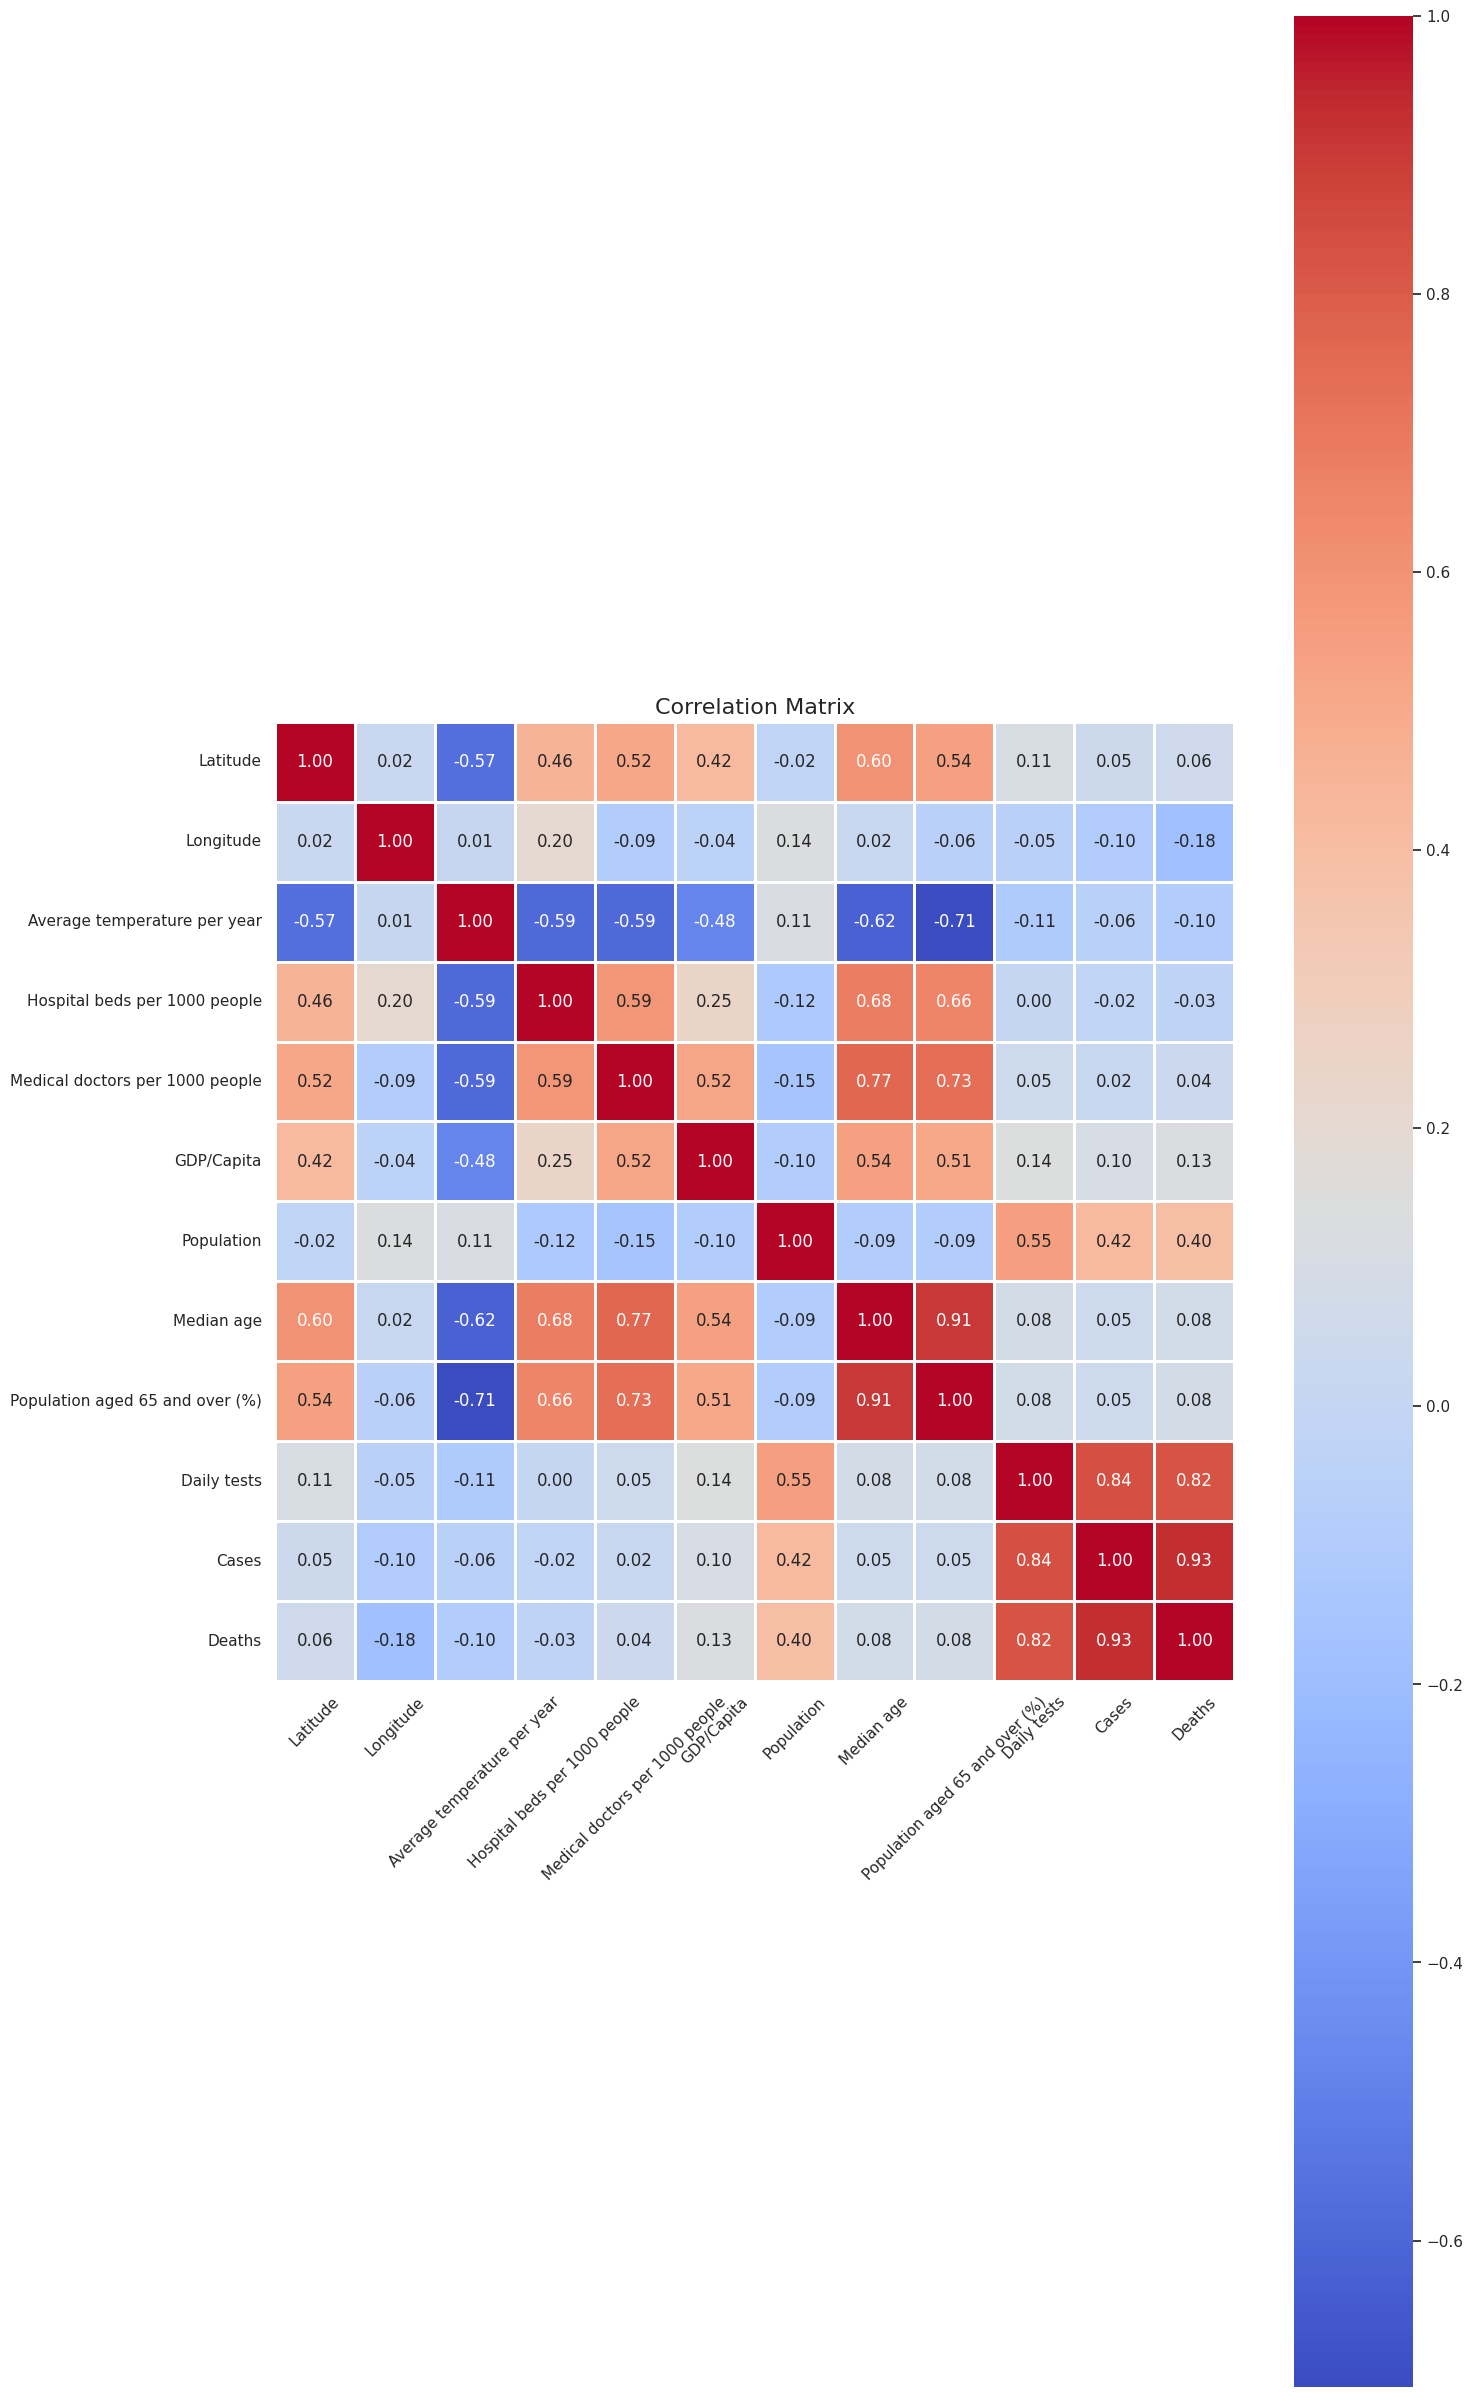

In [107]:
numerical_cols = dataset.select_dtypes(include=['number']).columns.tolist()

# Step 2: Compute the correlation matrix
correlation_matrix = dataset[numerical_cols].corr()

plt.figure(figsize=(15,30))

sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', square=True,
            cbar_kws={"shrink": .8}, linewidths=0.8)

plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)

plt.tight_layout()
plt.show()

In [113]:
#@title Creating Dataset

data = {
    'student': [1,  2,  3,  4,  5,  6,  7,  8,  9, 10],
    'prior_experience': ['Yes','No','Yes','No','Yes','No','Yes','Yes','Yes','Yes'],
    'course': ['programming','programming','history','programming','english','programming','programming','mathematics','programming','programming'],
    'time': ['day','day','night','night','day','day','day','night','night','night'],
    'liked':['Yes','No','No','Yes','Yes','No','No','Yes','Yes','No']
}

dataset = pd.DataFrame(data)
print("Dataset:\n", dataset)

dataset.to_csv(r'Task5_Dataset.csv', index=False)

Dataset:
    student prior_experience       course   time liked
0        1              Yes  programming    day   Yes
1        2               No  programming    day    No
2        3              Yes      history  night    No
3        4               No  programming  night   Yes
4        5              Yes      english    day   Yes
5        6               No  programming    day    No
6        7              Yes  programming    day    No
7        8              Yes  mathematics  night   Yes
8        9              Yes  programming  night   Yes
9       10              Yes  programming  night    No


In [114]:
#@title Task 5

df = pd.read_csv('/content/Task5_Dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   student           10 non-null     int64 
 1   prior_experience  10 non-null     object
 2   course            10 non-null     object
 3   time              10 non-null     object
 4   liked             10 non-null     object
dtypes: int64(1), object(4)
memory usage: 528.0+ bytes


In [115]:
df.pop('student')

,student
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [118]:
def get_gini(df_subset):
    values = df_subset.iloc[:, -1].value_counts().to_dict()
    if 'No' not in values:
        return (0, values['Yes'])
    if 'Yes' not in values:
        return (0, values['No'])
    yes_prob = values['Yes']/(values['Yes'] + values['No'])
    no_prob = values['No']/(values['Yes'] + values['No'])
    gini = 1 - yes_prob**2 - no_prob**2
    return (gini, values['Yes'] + values['No'])

length = len(df)
gini_index_columns = {}
for column in df.columns:
    if column == 'liked':
        continue
    column_unique = df[column].unique()
    gini_index = 0
    for uniq in column_unique:
        gini, no_of_datapoint = get_entropy(df[df[column] == uniq])
        gini_index += (no_of_datapoint / length) * gini
    gini_index_columns[column] = gini_index

gini_index_columns

{'prior_experience': 0.965148445440323,
 'course': 0.6896596952239761,
 'time': 0.9709505944546686}

In [119]:
min_gini = 1
min_gini_column_name = ''
for key, value in gini_index_columns.items():
    if value < min_gini:
        min_gini = value
        min_gini_column_name = key

print(f'Root Node: {min_gini_column_name}, Gini Index: {min_gini}')

Root Node: course, Gini Index: 0.6896596952239761
